Hi everyone, My name is Sakshi Katiyar and I prepared a project to classify the fake and true news as a part of my internship with Edufabrica, Awaaz-IIT Kharagpur.

In today's digital world, misinformation spreads faster than ever. With this project, I aimed to tackle the spread of fake news using machine learning.

By analyzing real and fake news articles, my model attempts to differentiate between truthful and misleading content , a crucial step toward maintaining digital integrity and media literacy.

The core objective of this project was to build a machine learning classifier that can detect whether a news article is real or fake based on its content. I used two datasets:

Fake.csv: Contains fake news articles.

True.csv: Contains verified news articles.

                    Steps followed in this project:

Loaded and combined both datasets with labels ("fake" and "real").

Preprocessed the text data( removed punctuation, lowercased, tokenized, and applied TF-IDF vectorization.)

Split the data into training and testing sets.

Trained and evaluated three machine learning models

Logistic Regression

Passive Aggressive Classifier

Multinomial Naive Bayes


In [24]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [12]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [15]:
fake = pd.read_csv("Fake.csv")  # It reads from the current session
fake.head()
true = pd.read_csv("True.csv")  # It reads from the current session
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
#Labels
fake["label"] = 0  # Fake news
true["label"] = 1  # Real news

In [17]:
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
df.head()

,title,text,subject,date,label
0,Neil deGrasse Tyson And J.K. Rowling BURN Tru...,"There is no getting away from Donald Trump, an...",News,"October 15, 2016",0
1,U.S. candidate Rubio: conditions not right for...,(Reuters) - U.S. Republican presidential candi...,politicsNews,"March 11, 2016",1
2,FEDERAL PROSECUTOR Working On Plea Deal For IS...,A plea deal for this punk will really make ano...,politics,"Oct 29, 2015",0
3,"Iraq Kurdish vote may benefit Syrian Kurds, sa...",BEIRUT (Reuters) - The Iraqi Kurdish vote for ...,worldnews,"September 27, 2017",1
4,WHAT DONALD TRUMP WILL DO For Christmas Now Th...,,left-news,"Nov 15, 2016",0


In [18]:
#Preprocessing
df = df[["text", "label"]]
df.dropna(inplace=True)

/tmp/ipython-input-18-2389520535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [19]:
#Train-Test Spilt
from sklearn.model_selection import train_test_split
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [22]:
#Evaluation
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9865256124721603

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4655
           1       0.99      0.98      0.99      4325

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4599   56]
 [  65 4260]]


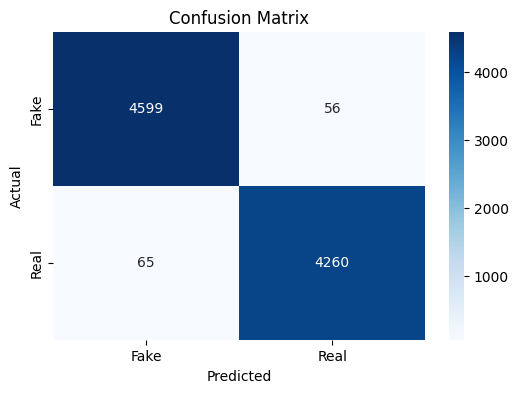

In [23]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Each model was evaluated using accuracy, confusion matrix, and classification report. The results were:

Logistic Regression performed the best with accuracy over 98%, showing strong precision and recall in distinguishing fake news.

Multinomial Naive Bayes and Passive Aggressive Classifier also showed competitive results, with slight variations in precision and F1-score.

The classifier can now predict whether a new article is fake or real based on its content.


This project demonstrates how Natural Language Processing (NLP) combined with supervised machine learning can help fight misinformation. While not perfect, models like these can assist journalists, platforms, and readers in evaluating content authenticity.